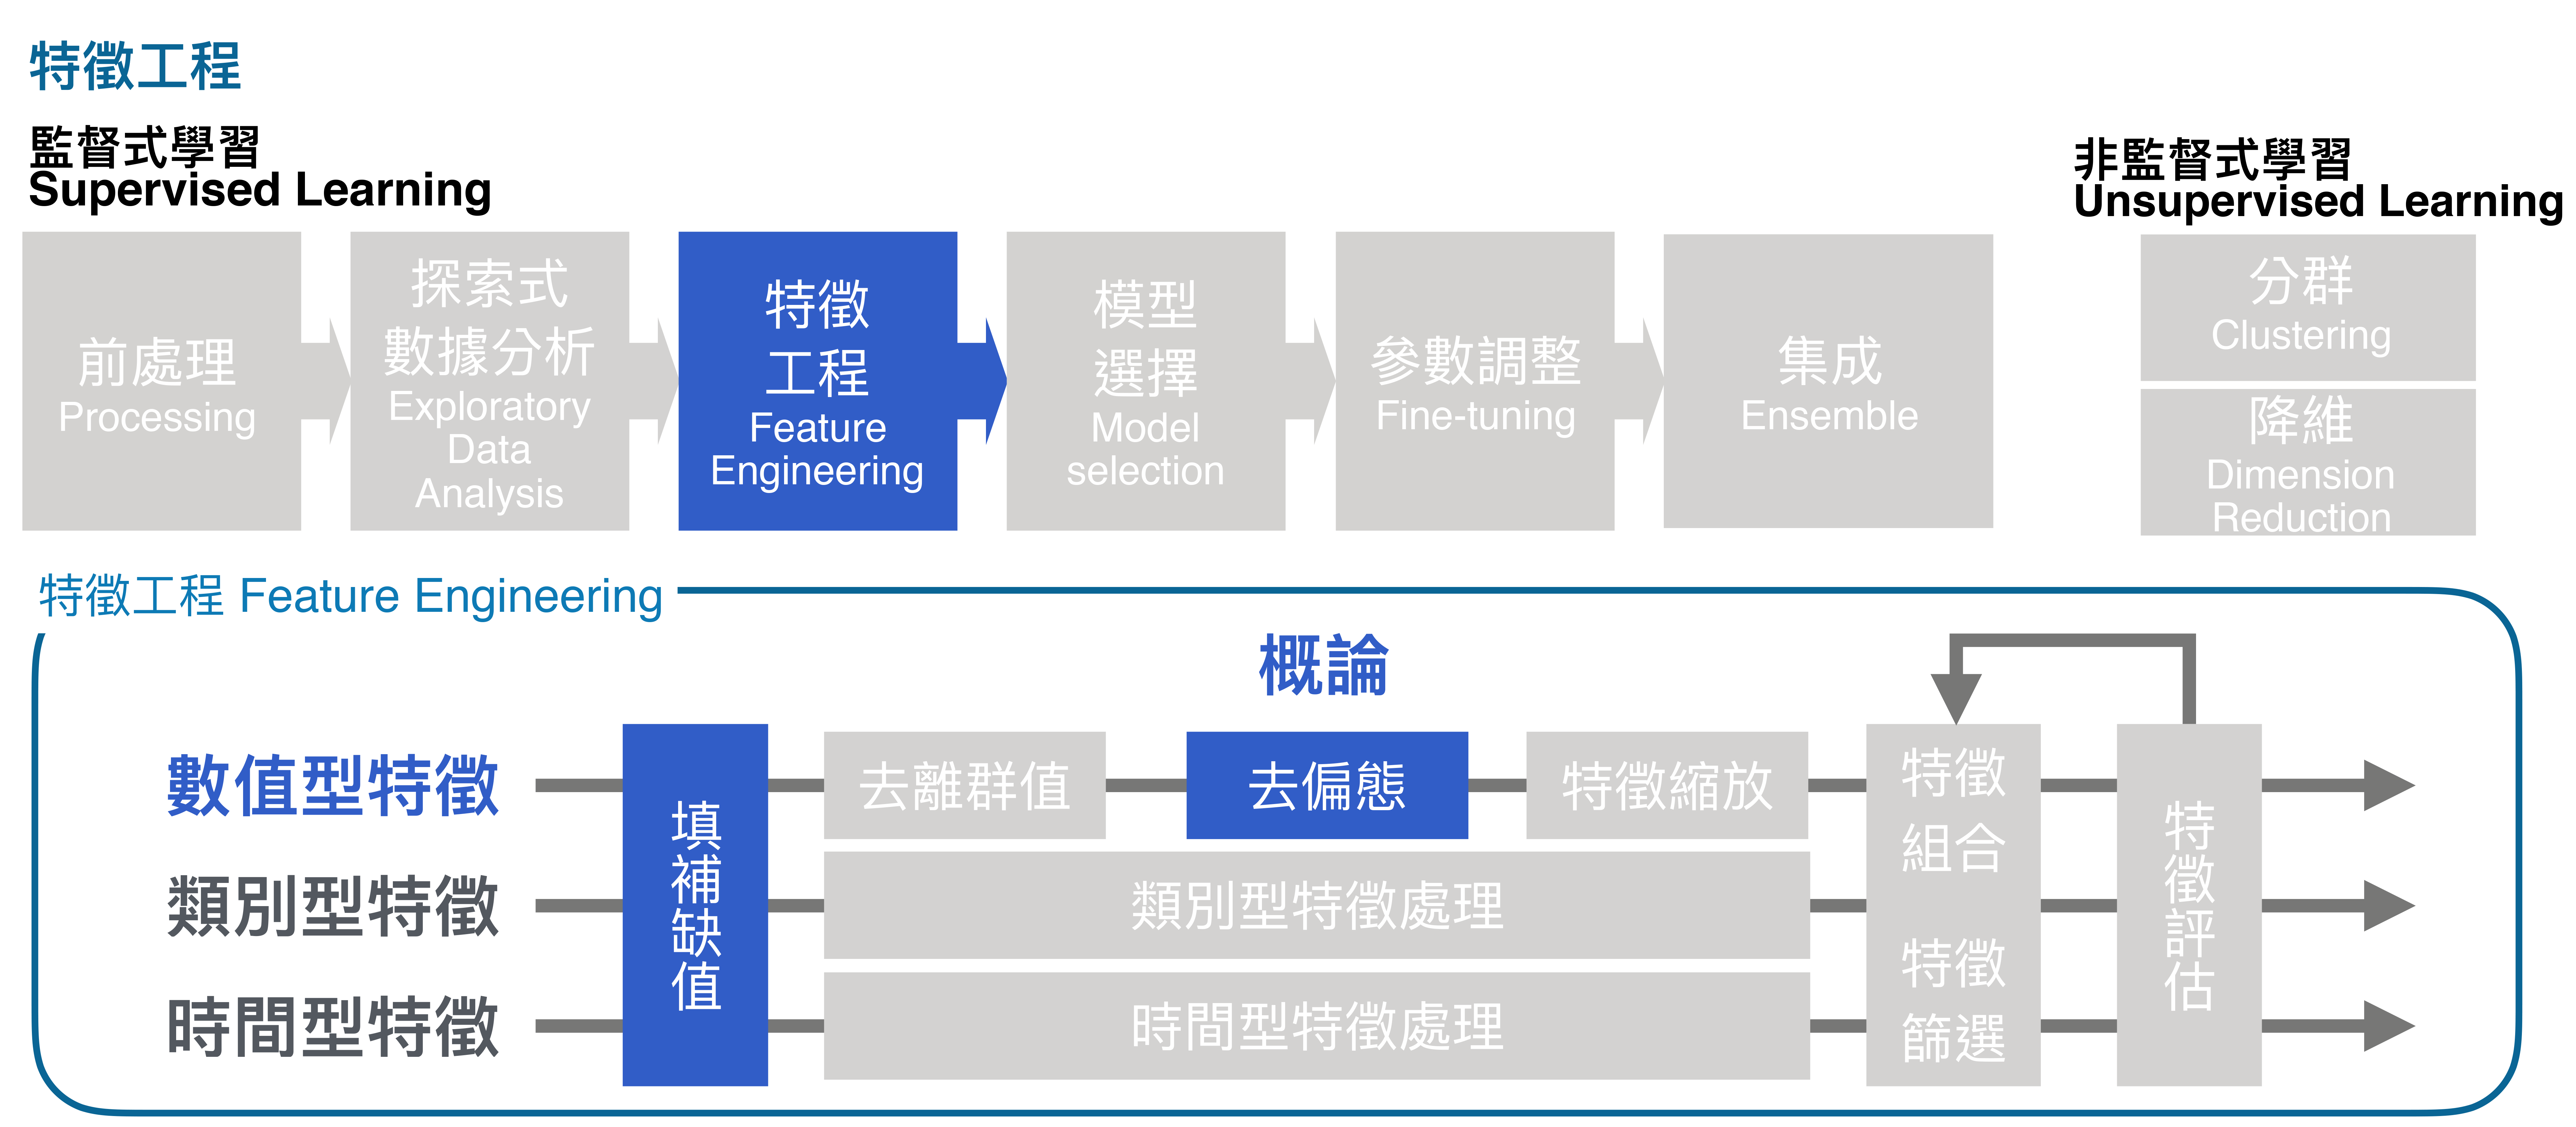

In [32]:
from IPython.display import Image
Image(filename='/Users/tsaichiatien/Dev/100Day-ML-Marathon/homework/Image/feature_engineering_skewness_removal.png')


# 作業 : (Kaggle)鐵達尼生存預測 
https://www.kaggle.com/c/titanic

# Note
- "log1p": 
    The process of log shift is to use natural logarithm to remove skewness. It is commonly used for non-negative fields, such as counts or prices, that may also include zeros. Since we need to map 0 to 0, we first add one, then take the logarithm. To reverse this process, we use expm1, meaning we first take the exponentiation and then subtract one.
- "Squrt root": 
Square root transformation (sqrt) is subtracting the minimum value from the data and then taking the square root, applicable when the maximum value is limited (e.g., grade conversion).

- "Boxcox": 
The Box-Cox transformation uses the Box-Cox transformation function. When the lambda (λ) parameter of the function is 0, it equals the log function, and when λ is 0.5, it equals the square root function. Thus, it allows for more flexible value transformation through adjusting the parameter. It's important to note that the input values of Y must be positive (cannot be 0).

- When the proportion of outliers is too high, or when the mean does not adequately represent the data, it is advisable to consider removing skewness.

- Skewness removal methods include: log shift, square root shift, and Box-Cox transformation.

- When using the Box-Cox transformation to remove skewness, besides ensuring that the λ parameter falls between 0 and 0.5, it's important to note that the values before transformation cannot be less than or equal to 0.


# [作業目標]
- 試著模仿範例寫法, 在鐵達尼生存預測中, 觀察降低偏態的影響
- Removing Skewness

# [作業重點]
- 觀察使用log1p降偏態時, 對於分布與迴歸分數的影響 (In[6], Out[6])
- 修正區塊中的資料問題後, 觀察以box-cox降偏態, 對於分布與迴歸分數的影響 (In[7], Out[7])

In [33]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
import copy
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

data_path = 'data/'
df_train = pd.read_csv(data_path + 'titanic_train.csv')
df_test = pd.read_csv(data_path + 'titanic_test.csv')

train_Y = df_train['Survived']
ids = df_test['PassengerId']
df_train = df_train.drop(['PassengerId', 'Survived'] , axis=1)
df_test = df_test.drop(['PassengerId'] , axis=1)
df = pd.concat([df_train,df_test])
df.head()

Pclass                                               Name     Sex   Age  \
0       3                            Braund, Mr. Owen Harris    male  22.0   
1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
2       3                             Heikkinen, Miss. Laina  female  26.0   
3       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4       3                           Allen, Mr. William Henry    male  35.0   

   SibSp  Parch            Ticket     Fare Cabin Embarked  
0      1      0         A/5 21171   7.2500   NaN        S  
1      1      0          PC 17599  71.2833   C85        C  
2      0      0  STON/O2. 3101282   7.9250   NaN        S  
3      1      0            113803  53.1000  C123        S  
4      0      0            373450   8.0500   NaN        S

In [34]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

# 削減文字型欄位, 只剩數值型欄位
df = df[num_features]
df = df.fillna(0)
MMEncoder = MinMaxScaler()
train_num = train_Y.shape[0]
df.head()

5 Numeric Features : ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']



Pclass   Age  SibSp  Parch     Fare
0       3  22.0      1      0   7.2500
1       1  38.0      1      0  71.2833
2       3  26.0      0      0   7.9250
3       1  35.0      1      0  53.1000
4       3  35.0      0      0   8.0500

/Users/tsaichiatien/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


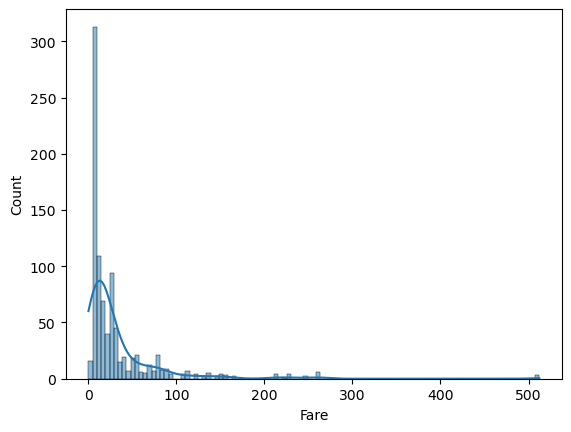

In [35]:
sns.histplot(df['Fare'][:train_num], kde=True)
plt.show()

In [36]:
# Calculate the baseline score.
df_mm = MMEncoder.fit_transform(df)
train_X = df_mm[:train_num]
estimator = LogisticRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.7015378821166279

# 作業1 
* 試著在鐵達尼的票價 (Fare) 欄位中使用對數去偏 (log1p) , 結果是否更好?

/Users/tsaichiatien/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


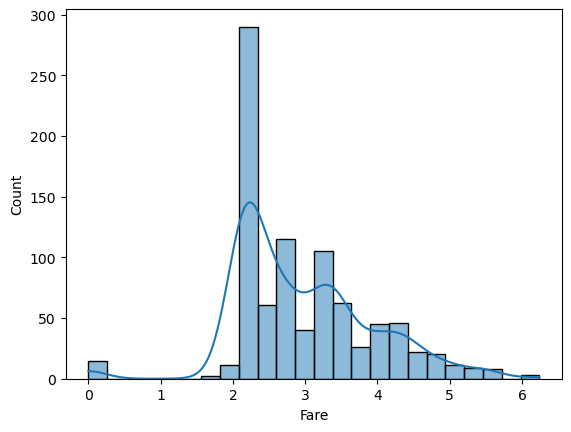

0.710545477371163

In [37]:
# did log1p for column Fare
df_fixed = copy.deepcopy(df)
df_fixed['Fare'] = np.log1p(df_fixed['Fare'])
sns.histplot(df_fixed['Fare'][:train_num], kde=True)
plt.show()

# Calculate the baseline score.
df_fixed = MMEncoder.fit_transform(df_fixed)
train_X = df_fixed[:train_num]
estimator = LogisticRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

# base line numer is better

# 作業2
* 最後的 boxcox 區塊直接執行會造成錯誤, 起因為輸入值有負值, 請問如何修正後可以使用 boxcox? (Hint : 試圖修正資料)

/Users/tsaichiatien/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


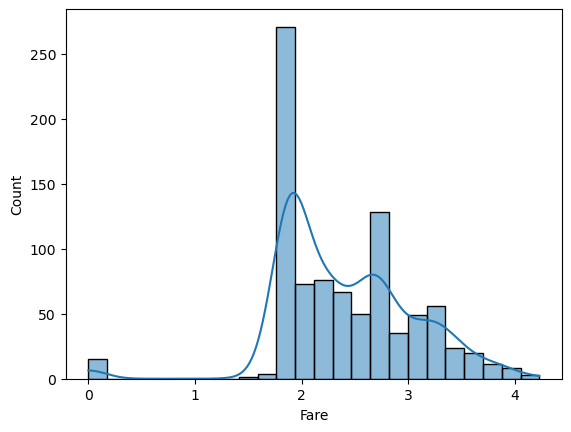

0.7094218818655451

In [38]:
# 將 Fare 取 boxcox 後, 看散佈圖, 並計算分數 (執行會有 error, 請試圖修正)
# Taking the Box-Cox transformation of the "Fare" column, plotting the distribution, and calculating a score. There might be an error when attempting to execute this. In order to address the error and provide a solution, I would need to know more specific details about the error being encountered.

from scipy import stats
df_fixed = copy.deepcopy(df)
"""
Your Code Here, fix the error
Answer: add one to make sure the value is positive
"""
df_fixed['Fare'] = df_fixed['Fare'] + 1
df_fixed['Fare'] = stats.boxcox(df_fixed['Fare'])[0]
sns.histplot(df_fixed['Fare'][:train_num], kde=True)
plt.show()

df_fixed = MMEncoder.fit_transform(df_fixed)
train_X = df_fixed[:train_num]
estimator = LogisticRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()